<a href="https://colab.research.google.com/github/ilona1234/MISP/blob/main/zaj%C4%99cia_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Optymalizacja produkcji okien - zajęcia 4**

Instalacja bibioteki pulp

In [1]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

     |████████████████████████████████| 40.6MB 95kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 14 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 h

**Problem - optymalizacja produkcji okien**

Pewna firma produkuje okna. Może wyprodukować dwa typy okien: drewniane i aluminiowe. Okna są produkowane w 3 fabrykach. Pierwsza fabryka produkuje 1 partię okien aluminiowych na godzinę, może pracować 4 godziny na tydzień. Druga fabryka produkuje 2 partie okien drewnianych na godzinę, może pracować 12 godzin na tydzień. Trzecia fabryka produkuje 3 partie okien aluminiowych oraz 2 partie okien drewnianych na godzinę, może pracować 18 godzin na tydzień. Pojedyńcza partia okien drewnianych przynosi 3000 zł zysku, adrewnianych 5000 zł zysku. 

W jaki sposób firma powinna dobrać produkcję, aby zmaksymalizować zysk?

|              | aluminiowe | drewniane | dostępność produkcji |
|--------------|------------|-----------|----------------------|
| Fabryka 1    | 1          | X         | 4 h/tydzień          |
| Fabryka 2    | X          | 2         | 12 h/tydzień         |
| Fabryka 3    | 3          | 2         | 18 h/tydzień         |
| Zysk z partii| 3000       |5000       |                      |

**Etapy rozwiązania problemu:**
- **określenie zmiennych decyzyjnych**

  liczba partii okien aluminiowych - x1

  liczba partii okien drewnianych - x2
- **funkcja celu**

  maksymalizacja zysku

  funkcja = 3 * x1 + 5 * x2
- **ustalenie ograniczeń**

  - wymagania doyczące wydajności i dostępności fabryk

    3 * x1 + 2 * x2 <= 18

    1 * x1 <= 4

    2 * x2 <= 12
  - liczba partii nie może być ujemna

    x1 >= 0

    x2 >= 0


**Rozwiązanie graficzne**

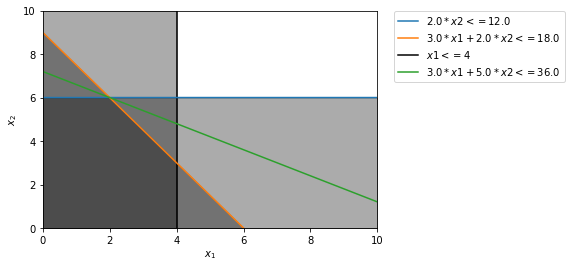

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.linspace(0, 10, 2000)


y1 = 0*x +6
y2=(18-3*x)/2
y3=(-3*x+36)/5
y4 = 0*x +1000
# Make plot

plt.plot(x, y1,label=r'$2.0*x2 <= 12.0$' )
plt.plot(x, y2,label=r'$3.0*x1 + 2.0*x2 <= 18.0$ ')
plt.plot(x, y4,color='black',label=r'$x1<=4$ ')
plt.plot(x, y3,label=r'$3.0*x1 + 5.0*x2 <= 36.0$ ')

plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.vlines(4,0,10)
# Fill feasible region
y5 = np.maximum(y1, 0)
y6 = np.maximum(y2, 0)

plt.fill_between(x,0, y6, color='black', alpha=0.33)
plt.fill_between(x,0, y5, color='black', alpha=0.33)
plt.fill_betweenx(x,4,0 , color='black', alpha=0.33)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Najciemniejszy obszar spełnia wszystkie ograniczenia.
Pola jaśniejsze spełniają tylko część założeń.

**Rozwiązanie za pomoca biblioteki pulp**

In [5]:
from pulp import *
prob = LpProblem("Okna",LpMaximize) # inicjalizacja problemu, maksymalizacja

x1=LpVariable("aluminium",0) # tworzenie zmiennych partii z ograniczeniem od zera
x2=LpVariable("drewno",0)

prob += 3000*(x1) + 5000*(x2), "Całkowity zysk"
prob += 1.0*x1 <= 4.0, "Ograniczenia pierwszej fabryki"
prob += 2.0*x2 <= 12.0, "Ograniczenia drugiej fabryki"
prob += 3.0*x1 + 2.0*x2 <= 18.0, "Ograniczenia trzeciej fabryki"



prob.writeLP("Okna.lp")
prob.solve()
print("Status:", LpStatus[prob.status])
print("Całkowity zysk = ", value(prob.objective))
print("Wyprodukowano:")

for v in prob.variables():
   print(v.name, "=", v.varValue, "partie")

#!cat "Problem3.lp"

Status: Optimal
Całkowity zysk =  36000.0
Wyprodukowano:
aluminium = 2.0 partie
drewno = 6.0 partie


**Wersja z regulacją dostępności partii oraz zysku**

In [13]:
from pulp import *
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, FloatSlider, IntSlider
import ipywidgets as widgets
import pandas as pd

style = {'description_width': 'initial'}

# inicjalizacja sliderów
liczba_godzin_partii_1_f1_slider = IntSlider(min=0,max = 15, value= 1, step = 1, description="czas produkcji aluminiowych f1", style= style )
liczba_godzin_partii_2_f2_slider = IntSlider(min=0,max = 15, value= 2, step = 1,description="czas produkcji drewnianych f2", style= style )
liczba_godzin_partii_1_f3_slider = IntSlider(min=0,max = 15, value= 3, step = 1,description="czas produkcji aluminiowych f3", style= style )
liczba_godzin_partii_2_f3_slider = IntSlider(min=0,max = 15, value= 2, step = 1,description="czas produkcji drewnianych f3", style= style )
zysk_partii_1_slider = IntSlider(min=0,max = 5000, value= 3000, step = 1,description="zysk_partii_aluminiowych", style= style )
zysk_partii_2_slider = IntSlider(min=0,max = 5000, value= 5000, step = 1,description="zysk_partii_drewnianych", style= style )

def produkcja(liczba_godzin_partii_1_f1 = 1, #inicjalizacja funkcji rozwiązującej problem
    liczba_godzin_partii_2_f2 = 2,
    liczba_godzin_partii_1_f3 = 3,
    liczba_godzin_partii_2_f3 = 2,
    zysk_partii_1 = 3000,
    zysk_partii_2 = 5000):
    prob = LpProblem("Okna", LpMaximize) # inicjalizacja problemu, maksymalizacja

    x1=LpVariable("Ile partii aluminiowych",0) # tworzenie zmiennych partii z ograniczeniem od zera
    x2=LpVariable("Ile partii drewnianych",0)

    prob += 3000 *x1 + 5000 * x2, "Całkowity zysk"
    prob += liczba_godzin_partii_1_f1 * x1 <= 4.0, "Ograniczenia pierwszej fabryki"
    prob += liczba_godzin_partii_2_f2 * x2 <= 12.0, "Ograniczenia drugiej fabryki"
    prob += liczba_godzin_partii_1_f3 * x1 + liczba_godzin_partii_2_f3 * x2 <= 18.0, "Ograniczenia trzeciej fabryki"

    prob.solve() # rozwiązanie problemu

    for v in prob.variables():
        print (v.name, "=", v.varValue) #wyświetlenie wartości zmiennych

    print ("Maksymalny zysk to: ", value(prob.objective),"zł" )

    shadows = [{'name':name, 'shadow price': c.pi, "slack": c.slack} for name, c in prob.constraints.items()]
    print("*"*10+"Shadow Prices"+"*"*10)
    print(pd.DataFrame(shadows))

interact(produkcja, liczba_godzin_partii_1_f1 = liczba_godzin_partii_1_f1_slider,
    liczba_godzin_partii_2_f2 = liczba_godzin_partii_2_f2_slider,
    liczba_godzin_partii_1_f3 = liczba_godzin_partii_1_f3_slider,
    liczba_godzin_partii_2_f3 = liczba_godzin_partii_2_f3_slider,
    zysk_partii_1 = zysk_partii_1_slider,
    zysk_partii_2 = zysk_partii_2_slider)



interactive(children=(IntSlider(value=1, description='czas produkcji aluminiowych f1', max=15, style=SliderSty…

<function __main__.produkcja>